# HW07 Corpus Comparison

In class, we studied corpus properties using the novel *Emma* by Jane Austen. This homework asks you to run similar analysis for another novel, *Sense and Sensibility*, also by Jane Austen. Both novels are available in the `gutenberg` corpus of the `nltk` module.

In [1]:
# Run this once:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

# List files available in this corpus
print(gutenberg.fileids())

emma = gutenberg.raw('austen-emma.txt')
print('-----------------------')
print(emma[0:100])

sense = gutenberg.raw('austen-sense.txt')
print('-----------------------')
print(sense[0:100])

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
-----------------------
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a
-----------------------
[Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settle


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Ritwik\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


## 1. General Document Features (20 points)

We may load the two novels as raw text (`gutenberg.raw()`), by paragraphs (`gutenberg.paras()`), by sentences (`gutenberg.sents()`), or words (`gutenberg.words()`). Using these functions, compare the two novels by the following features:

* Number of characters, words, sentences, and paragraphs.
* The average length of words (by the number of characters), sentences (by the number of words), and paragraphs (by the number of sentences).

Note: use Python program to print out the numbers, and then, summarize the findings in your own words.

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ritwik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
## Number of Characters in Emma
print(len(emma))

## Number of Words in Emma
emma_words = gutenberg.words('austen-emma.txt')
print(len(emma_words))

## Number of Sentences in Emma
emma_sents = gutenberg.sents('austen-emma.txt')
print(len(emma_sents))

## Number of Paragraphs in Emma
emma_para = gutenberg.paras('austen-emma.txt')
print(len(emma_para))

887071
192427
7752
2371


In [4]:
## Number of Characters in Sense
print(len(sense))

## Number of Words in Emma
sense_words = gutenberg.words('austen-sense.txt')
print(len(sense_words))

## Number of Sentences in Emma
sense_sents = gutenberg.sents('austen-sense.txt')
print(len(sense_sents))

## Number of Paragraphs in Emma
sense_para = gutenberg.paras('austen-sense.txt')
print(len(sense_para))

673022
141576
4999
1862


In [5]:
#Average Word Length for Emma
emma_avg_words = len([char for word in gutenberg.words('austen-emma.txt') for char in word ])/len(gutenberg.words('austen-emma.txt'))
print("Average Length of Word in Emma:",emma_avg_words)

#Average Sentence Length for Emma
emma_avg_sent = len(gutenberg.words('austen-emma.txt'))/len(gutenberg.sents('austen-emma.txt'))
print("Average Length of Sentence in Emma:",emma_avg_sent)

#Average Para Length for Emma
emma_avg_para = len(gutenberg.sents('austen-emma.txt'))/len(gutenberg.paras('austen-emma.txt'))
print("Average Length of Para in Emma:",emma_avg_para)

#Average Word Length for Sense
sense_avg_words=len([char for word in gutenberg.words('austen-sense.txt') for char in word ])/len(gutenberg.words('austen-sense.txt'))
print("Average Length of Word in Sense:",sense_avg_words)

#Average Sentence Length for Sense
sense_avg_sent=len(gutenberg.words('austen-sense.txt'))/len(gutenberg.sents('austen-sense.txt'))
print("Average Length of Sentence in Sense:",sense_avg_sent)

#Average Para Length for Sense
sense_avg_para=len(gutenberg.sents('austen-sense.txt'))/len(gutenberg.paras('austen-sense.txt'))
print("Average Length of Para in Sense:",sense_avg_para)

Average Length of Word in Emma: 3.755268231589122
Average Length of Sentence in Emma: 24.822884416924666
Average Length of Para in Emma: 3.2695065373260226
Average Length of Word in Sense: 3.881371136350794
Average Length of Sentence in Sense: 28.32086417283457
Average Length of Para in Sense: 2.6847475832438237


Response: The novel Sense and Sensibility in relatively small than the Novel Emma, in terms of characters, words, sentences, or paragraphs. This does not come up as a surprise since an increase in one would lead to an increase in the rest of the structures. The novel 'Emma' has about 500 more paragraphs, 2750 more sentences, 50000 more words, and 214000 more characters as comapred to the novel 'Sense and Sensibility.'

## 2. Create Corpus

In this part, suppose we plan to compare word frequencies between the two novels. In order to share the same vocabulary indexing, we shall treat each novel as a document and create a corpus of two documents. Take the following steps.

### a) Text Preprocessing (5 points)

Remove punctuation from raw text and convert each novel into a list of clean tokens. The following sample code is adapted from class example. Be sure to apply it to the 2nd novel (Sense and Sensibility) document. Note: we do not drop stopwords in this assignment.

In [6]:
# remove punctuation
import re
def remove_characters_before_tokenization(sentence):
    sentence = sentence.strip()
    PATTERN = r'[^a-zA-Z0-9 ]'
    filtered_sentence = re.sub(PATTERN, r' ', sentence)
    return filtered_sentence

emma = remove_characters_before_tokenization(emma) 
emma[0:100]

# split into tokens
emma_tokens = emma.lower().strip().split()

# process `sense` here
sense = remove_characters_before_tokenization(sense) 
sense[0:100]

# split into tokens
sense_tokens = sense.lower().strip().split()

### b) Create Shared Dictionary and Summarize Term Frequencies (15 points)

First, create a list of these two documents, each represented as a list of tokens from the previous step.

In [7]:
## Combined List
text_corpus = emma_tokens + sense_tokens
type(text_corpus)

list

Then, generate a `gensim.corpora.Dictionary` based on the above list.

In [8]:
import pprint
# Create a set of frequent words to drop
stoplist = ''

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear even once
processed_corpus = [[token for token in text if frequency[token] > 0] for text in texts]
## pprint.pprint(processed_corpus)

from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(9090 unique tokens: ['emma', 'by', 'jane', 'austen', '1816']...)


In [9]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

Finally, create a data frame of three columns: (1) frquency of token in the first novel (`emma`), (2) frquency of token in the second novel (`sense`), and (3) the total frequency of token in the corpus. The unique tokens are used as the shared index.

In [10]:
# Count word frequencies
from collections import defaultdict
frequency_emma = defaultdict(int)
for token in emma_tokens:
    frequency_emma[token] += 1
    
# Convert to data frame
import pandas as pd

data1 = pd.Series(frequency_emma)
df1 = pd.DataFrame({'Emma':data1})
df1 = df1.sort_values(by=['Emma'],ascending=False)
df1.index.name = 'word'
df1.reset_index(inplace=True)
df1

,word,Emma
0,to,5242
1,the,5204
2,and,4897
3,of,4293
4,i,3192
...,...,...
7098,vacancies,1
7099,reappearance,1
7100,shoulder,1
7101,invariable,1


In [11]:
# Count word frequencies
frequency_sense = defaultdict(int)
for token in sense_tokens:
    frequency_sense[token] += 1

# Convert to data frame
import pandas as pd

data2 = pd.Series(frequency_sense)
df2 = pd.DataFrame({'Sense':data2})
df2 = df2.sort_values(by=['Sense'],ascending=False)
df2.index.name = 'word'
df2.reset_index(inplace=True)
df2

,word,Sense
0,to,4116
1,the,4105
2,of,3572
3,and,3491
4,her,2551
...,...,...
6331,coxcombs,1
6332,modestest,1
6333,prettiest,1
6334,lip,1


In [12]:
# Count word frequencies
frequency_all = defaultdict(int)
for token in text_corpus:
    frequency_all[token] += 1

# Convert to data frame
import pandas as pd

data3 = pd.Series(frequency_all)
df3 = pd.DataFrame({'Total':data3})
df3 = df3.sort_values(by=['Total'],ascending=False)
df3.index.name = 'word'
df3.reset_index(inplace=True)
df3

,word,Total
0,to,9358
1,the,9309
2,and,8388
3,of,7865
4,a,5222
...,...,...
9085,fed,1
9086,importation,1
9087,novelties,1
9088,interchange,1


In [13]:
merged_df = pd.merge(left=df1, right=df3, how = 'right', left_on='word', right_on='word')
merged_df2 = pd.merge(left=df2, right=df3, how = 'right', left_on='word', right_on='word')
final_df = pd.merge(left = merged_df, right = merged_df2, how = "inner", left_on = "word", right_on = "word")
final_df = final_df.drop(columns = ['Total_x'])
final_df = final_df.rename(columns={"Total_y": "Total"})
final_df = final_df.set_index('word')
final_df

,Emma,Sense,Total
word,,,
to,5242.0,4116.0,9358
the,5204.0,4105.0,9309
and,4897.0,3491.0,8388
of,4293.0,3572.0,7865
a,3130.0,2092.0,5222
...,...,...,...
fed,1.0,NaN,1
importation,1.0,NaN,1
novelties,1.0,NaN,1


## 3. Exploring Term Frequencies

### a) Long Tail Distribution (10 points)

Using bar plots, where the x-axis lays out term indexes by decreading term frequency and the y-axix shows the raw frequency, check if the term frequencies in each novel follows a highly skewed distribution, with a long tail to the right. 

[   1    2    3 ... 7101 7102 7103]


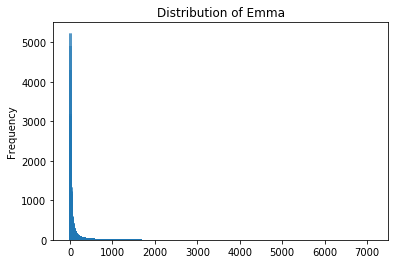

In [16]:
import numpy as np
import matplotlib.pyplot as plt
term_rank_1 = np.arange(data1.size) + 1
print(term_rank_1)

# basic bars
plt.bar(term_rank_1, df1['Emma'], align='center',width = 75,alpha=0.5)
plt.title('Distribution of Emma')
plt.ylabel('Frequency')
plt.show()

[   1    2    3 ... 6334 6335 6336]


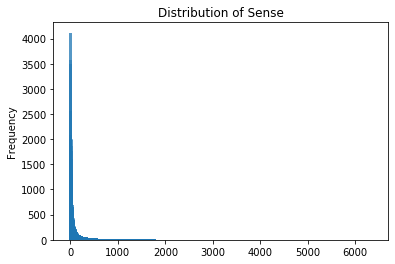

In [15]:
term_rank_2 = np.arange(data2.size) + 1
print(term_rank_2)

# basic bars
plt.bar(term_rank_2, df2['Sense'], align='center', width = 75, alpha=0.5)
plt.title('Distribution of Sense')
plt.ylabel('Frequency')
plt.show()

### b) Log-Log Plot (10 points)

Using the log scale on both x and y axes, represent the rank-frequency plot of both novels in the same plot. Do you see a pattern?

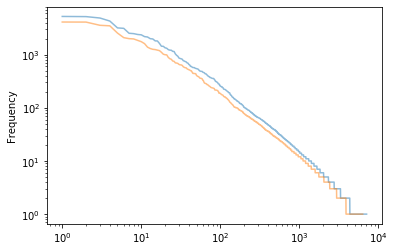

In [19]:
# log xy-axis
plt.plot(term_rank_1, df1['Emma'], label = "line1", alpha=0.5)
plt.plot(term_rank_2, df2['Sense'], label = "line2", alpha=0.5)
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.show()

Response: As depcited in the plot above, both the plots for both the novels follow a similar pattern, beginning from high frequency of words and than gradually going down.

## Bonus Questions

### a) Differentiating Features

Comparing the term frequency vectors of the two novels, which terms are the most different in distrubtion?
Run a chi-square test for each term between the documents and report top 100 terms with the smallest p-values.
Among these 100 terms, which ones over-reprsent in each novel?

### b) Sentence Level Modeling

In the above problems, we assumed that each novel/book is a document. Now, let's focus on all sentences in the novel *Emma*. In other words, we treat each sentence as a document, and the novel itself as the corpus. Build a bag-of-words representation and then convert it into TF-IDF. Which 20 terms had the highest IDF scores?